## PyTransit: Curving Light to your Liking
___

Author: Elmer Canales

Date: May 18, 2025

## Installation
___
PyTransit can easily be install by usig a 'pip install'

Latest version should be 2.6.14

In [1]:
# Installation of PyTransit
!pip install pytransit

PyTransit do uses matplotlib and numpy

In [2]:
# Importing numpy and matplotlil through 'inline'
%pylab inline 
sys.path.append('..')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Quadratic Model
___

In [3]:
# Specifically importing the 'QuadraticModel' from PyTransit
from pytransit import QuadraticModel

# Initializing variables and seed
npv = 50
seed(0)

# Initializing data
times_sc = linspace(0.85, 1.15, 1000)  # Short cadence time stamps
times_lc = linspace(0.85, 1.15,  100)  # Long cadence time stamps

# Initializing parameters
k, t0, p, a, i, e, w  = 0.1, 1., 2.1, 3.2, 0.5*pi, 0.3, 0.4*pi
ldc = array([0.3, 0.1])

# Parameters for the lightcurve
# Using normal and uniform distributuon
ks    = normal(k, 0.002, npv)
t0s   = normal(t0, 0.004, npv)
ps    = normal(p, 0.01, npv)
smas  = normal(a, 0.1, npv)
incs  = uniform(0.49*pi, 0.5*pi, npv)
es    = uniform(0, 0.25, npv)
ws    = uniform(0, 2*pi, npv)
ldc   = uniform(0.1, 0.5, size=(npv, 2))

# Initializing 'Quadratic' model
tm = QuadraticModel()

# Setting up the model by using 'set_data'
tm.set_data(times_sc)

In [4]:
# Defining function to plot the lightcurve
def plot_transits(tm, ldc, fmt='k'):
    fig, axs = subplots(1, 2, figsize = (13,3), constrained_layout=True, sharey=True)

    # Evaluate for scalar parameters
    flux = tm.evaluate(k, ldc[0], t0, p, a, i, e, w)
    axs[0].plot(tm.time, flux, fmt)
    axs[0].set_title('Scalar parameters')

    # Evaluate for npv parameters in parallel
    flux = tm.evaluate(ks, ldc, t0s, ps, smas, incs, es, ws)
    axs[1].plot(tm.time, flux.T, 'k', alpha=0.2)
    axs[1].set_title('Parameter vector')

    setp(axs[0], ylabel='Normalised flux')
    setp(axs, xlabel='Time [days]', xlim=tm.time[[0,-1]])

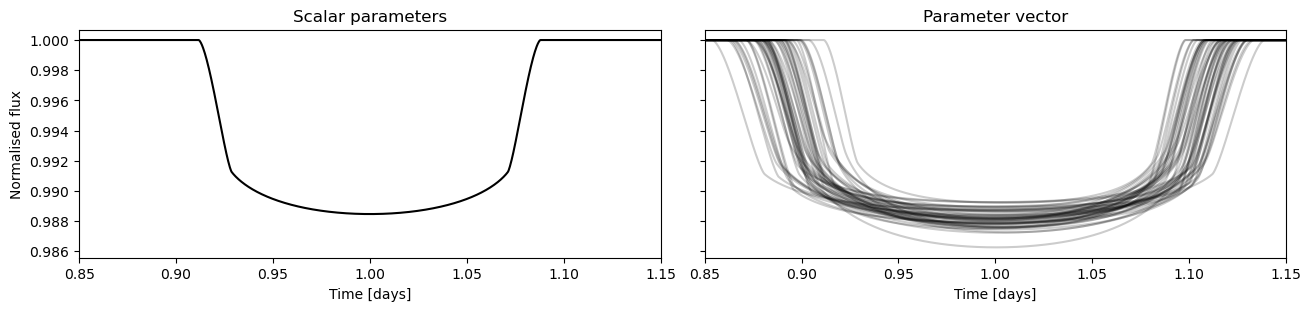

In [5]:
# Displaying the same model
plot_transits(tm, ldc)

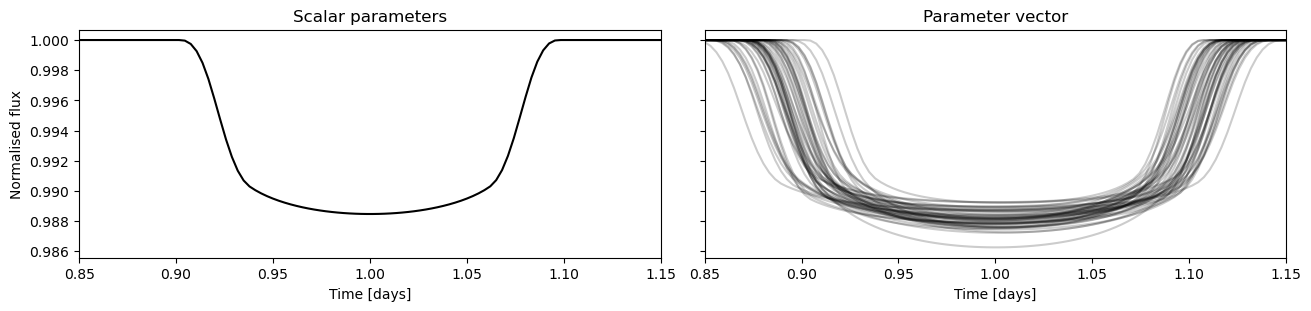

In [6]:
# Displaying the model, but "supersampling"
tm.set_data(times_lc, nsamples=10, exptimes=0.02)
plot_transits(tm, ldc)

## Raod Runner Model
___

In [7]:
# matplotlib 'inline' to import matplotlib
%matplotlib inline

# Importing necessary packages
from matplotlib import rc
from matplotlib.pyplot import setp, subplots
from numpy import linspace, pi, tile, repeat, arange
from numpy.random import uniform, normal, seed
from pytransit import RRModel

In [8]:
rc('figure', figsize=(13,5))

# Defining function to plot the lightcurve
def plot_lc(time, flux, c=None, ylim=(0.9865, 1.0025), ax=None):
    if ax is None:
        fig, ax = subplots()
    else:
        fig, ax = None, ax
    ax.plot(time, flux, c=c)
    ax.autoscale(axis='x', tight=True)
    setp(ax, xlabel='Time [days]', ylabel='Flux', xlim=time[[0,-1]], ylim=ylim)

    if fig is not None:
        fig.tight_layout()
    return ax

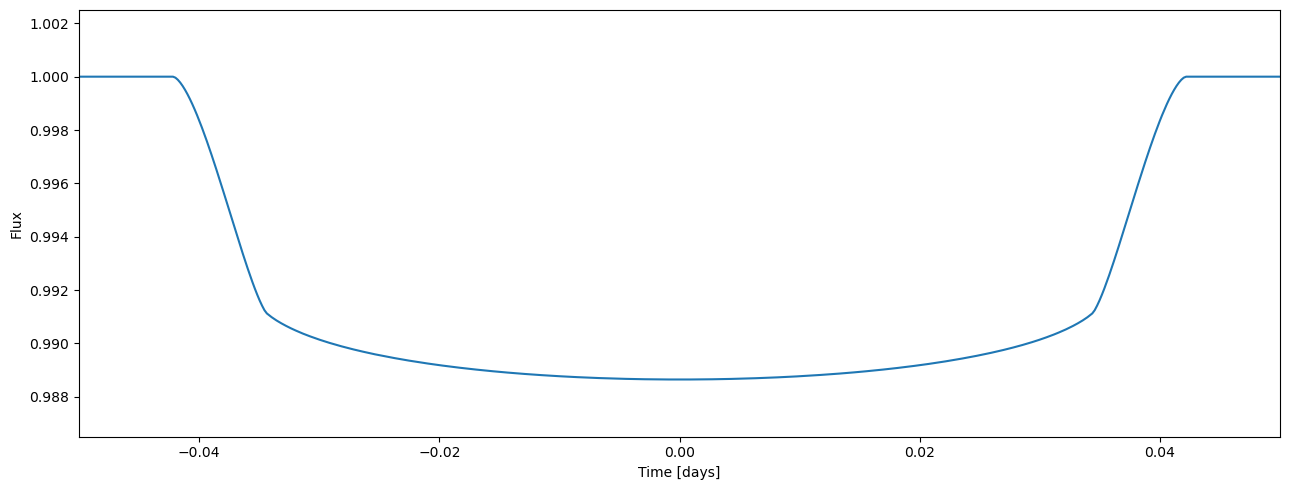

In [9]:
# Calling the Road Runner model and inputting data
tm = RRModel('power-2')
tm.set_data(time = linspace(-0.05, 0.05, 500))

# Calculating the flux
flux = tm.evaluate(k=0.1, ldc=[0.6, 0.5], t0=0.0, p=1.0, a=4.2, i=0.5*pi, e=0.0, w=0.0)

# Plotting the lightcurve
plot_lc(tm.time, flux);

## Using PyTransit on Data
___

In [10]:
# Specifically importing the 'QuadraticModel' from PyTransit
from pytransit import QuadraticModel

# Importing astropy to process and read the data 'fits' file 
from astropy.table import Table
# Storing 'fits' file data into a variable
t = Table.read('obs_data.fits')
# To see the data
# print(t)

# Initializing the data
times = t['time']

# Initializing parameters
k, t0, p, a, i, e, w  = 0.1, 1., 2.1, 3.2, 0.5*pi, 0.3, 0.4*pi
ldc = array([0.3, 0.1])

# Parameters for the lightcurve
ks = normal(k, 0.002, npv)
t0s = normal(t0, 0.004, npv)
ps  = normal(p, 0.01, npv)
smas = normal(a, 0.1, npv)
incs = uniform(0.49*pi, 0.5*pi, npv)
es  = uniform(0, 0.25, npv)
ws  = uniform(0, 2*pi, npv)
ldc = uniform(0.1, 0.5, size=(npv, 2))

# Initializing 'Quadratic' model
tm = QuadraticModel()

# Setting up the model by using 'set_data'
tm.set_data(times)

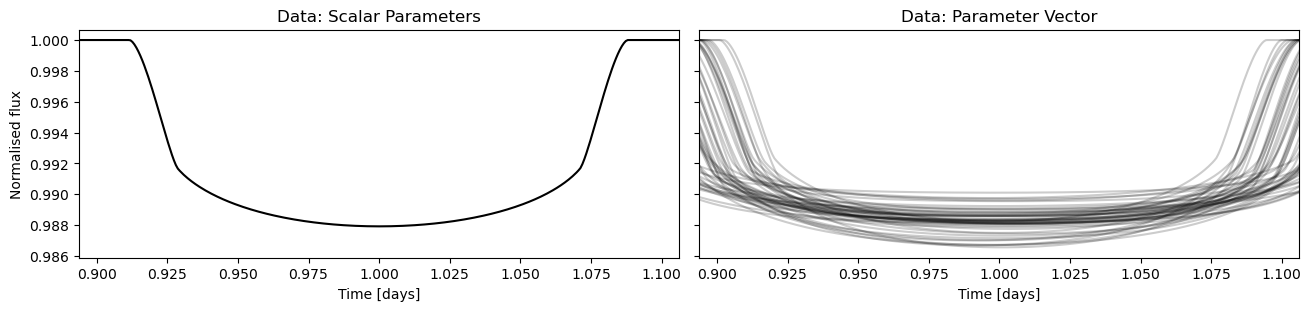

In [11]:
# Defing function to plot the data
def plot_transit(tm, ldc, fmt='k'):
    fig, axs = subplots(1, 2, figsize = (13,3), constrained_layout=True, sharey=True)

    # Evaluate for scalar parameters
    flux = tm.evaluate(k, ldc[0], t0, p, a, i, e, w)
    axs[0].plot(tm.time, flux, fmt)
    axs[0].set_title('Data: Scalar Parameters')

    # Evaluate for npv parameters in parallel
    flux = tm.evaluate(ks, ldc, t0s, ps, smas, incs, es, ws)
    axs[1].plot(tm.time, flux.T, 'k', alpha=0.2)
    axs[1].set_title('Data: Parameter Vector')

    setp(axs[0], ylabel='Normalised flux')
    setp(axs, xlabel='Time [days]', xlim=tm.time[[0,-1]])
    
# Displaying light curve
plot_transit(tm, ldc)

In [12]:
rc('figure', figsize=(13,5))

# Defining function to plot the data
def plot_lc(time, flux, c=None, ylim=(0.9865, 1.0025), ax=None):
    if ax is None:
        fig, ax = subplots()
    else:
        fig, ax = None, ax
    ax.plot(time, flux, c=c)
    ax.set_title('Data: Roadrunner Model')
    ax.autoscale(axis='x', tight=True)
    setp(ax, xlabel='Time [days]', ylabel='Flux', xlim=time[[0,-1]], ylim=ylim)

    if fig is not None:
        fig.tight_layout()
    return ax

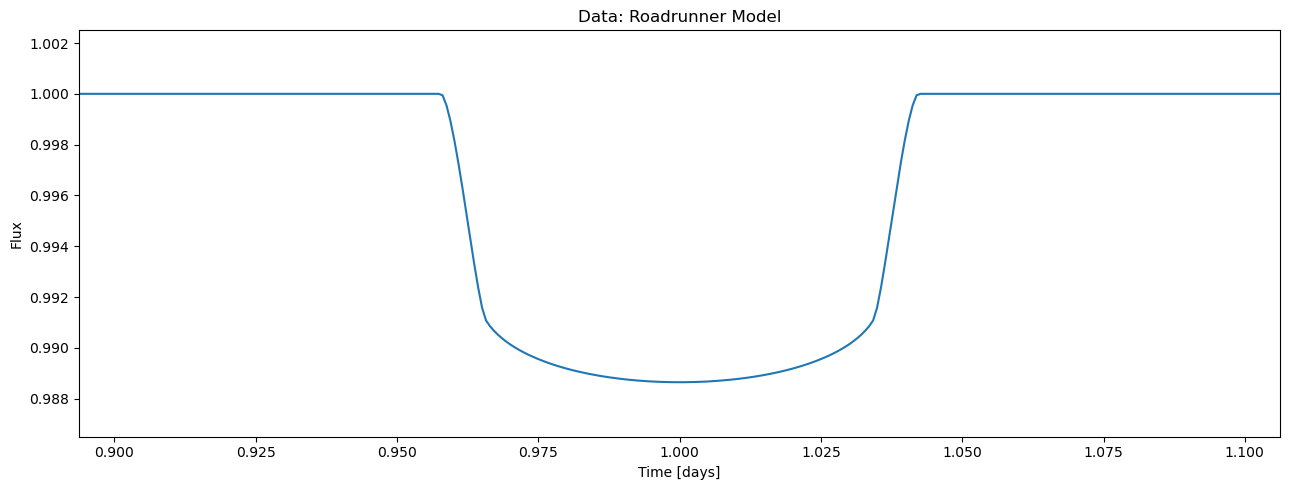

In [13]:
# Calling the Road Runner model and inputting data
tm = RRModel('power-2')
tm.set_data(times)

# Calculating the flux
flux = tm.evaluate(k=0.1, ldc=[0.6, 0.5], t0=0.0, p=1.0, a=4.2, i=0.5*pi, e=0.0, w=0.0)

# Plotting the lightcurve
plot_lc(tm.time, flux);